## **Student Performance Data**
- The following data was obtained in a survey of students' math course in secondary school. 
- It contains a lot of interesting Features like social, gender and study information about students.

**Note:** For Visulization I've used **Plotly** (in case if it's not installed in your pc, just type **pip install plotly** in Cell) and **Seaborn** Library

#### Library Imports

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as ex
import seaborn as sns
from plotly.io import templates
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder


sns.set(style= 'whitegrid', color_codes=True)
sns.set_theme(context='notebook',style='darkgrid',
              palette='deep',font='sans-serif',font_scale=1,color_codes=True,rc=None)
%matplotlib inline

In [191]:
# to measure linear / non-linear relationship B/W two columns
# pip install ppscore
import ppscore as pps

In [192]:
df= pd.read_csv('student_data.csv')
df.shape

(395, 33)

In [193]:
df.sample(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
83,GP,M,15,U,LE3,T,2,2,services,services,...,5,3,3,1,3,4,4,15,15,15
256,GP,F,17,U,LE3,T,4,2,teacher,services,...,4,2,3,1,1,4,6,14,12,13
75,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,3,2,3,5,6,9,9,10
39,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,13


### 1. Visualizing the correlations between various features and grades and see which features have a significant impact on grades.
- Engineering the three grade parameters (G1, G2 and G3) as one feature for such comparisons.

In [194]:
# AVG grade of each student
grad_mean= (df.G1 + df.G2 + df.G3) / 3
df['G_Mean'] = grad_mean
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_Mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,11.000000


In [195]:
# Calculating the Predictive Power Score (PPS) matrix for all columns in the dataframe
pps_matrix = pps.matrix(df)

In [196]:
pps_df = pd.DataFrame(pps_matrix)
pps_df.loc[pps_df['x'] == 'G_Mean']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1122,G_Mean,school,0.000000,classification,True,weighted F1,0.828917,0.823841,DecisionTreeClassifier()
1123,G_Mean,sex,0.000000,classification,True,weighted F1,0.503797,0.450849,DecisionTreeClassifier()
1124,G_Mean,age,0.000000,regression,True,mean absolute error,1.053165,1.156420,DecisionTreeRegressor()
1125,G_Mean,address,0.000000,classification,True,weighted F1,0.679787,0.645180,DecisionTreeClassifier()
1126,G_Mean,famsize,0.000000,classification,True,weighted F1,0.620253,0.601176,DecisionTreeClassifier()
1127,G_Mean,Pstatus,0.064255,classification,True,weighted F1,0.847145,0.856966,DecisionTreeClassifier()
1128,G_Mean,Medu,0.000000,regression,True,mean absolute error,0.913924,0.984267,DecisionTreeRegressor()
1129,G_Mean,Fedu,0.000000,regression,True,mean absolute error,0.956962,1.034284,DecisionTreeRegressor()
1130,G_Mean,Mjob,0.000000,classification,True,weighted F1,0.230380,0.221438,DecisionTreeClassifier()
1131,G_Mean,Fjob,0.100538,classification,True,weighted F1,0.389873,0.451214,DecisionTreeClassifier()


#### Using the Predictive Power Score, we can observe that School, Medu, Fedu, Pstatus, goout are the important features which impact our target column G_Mean

<AxesSubplot:>

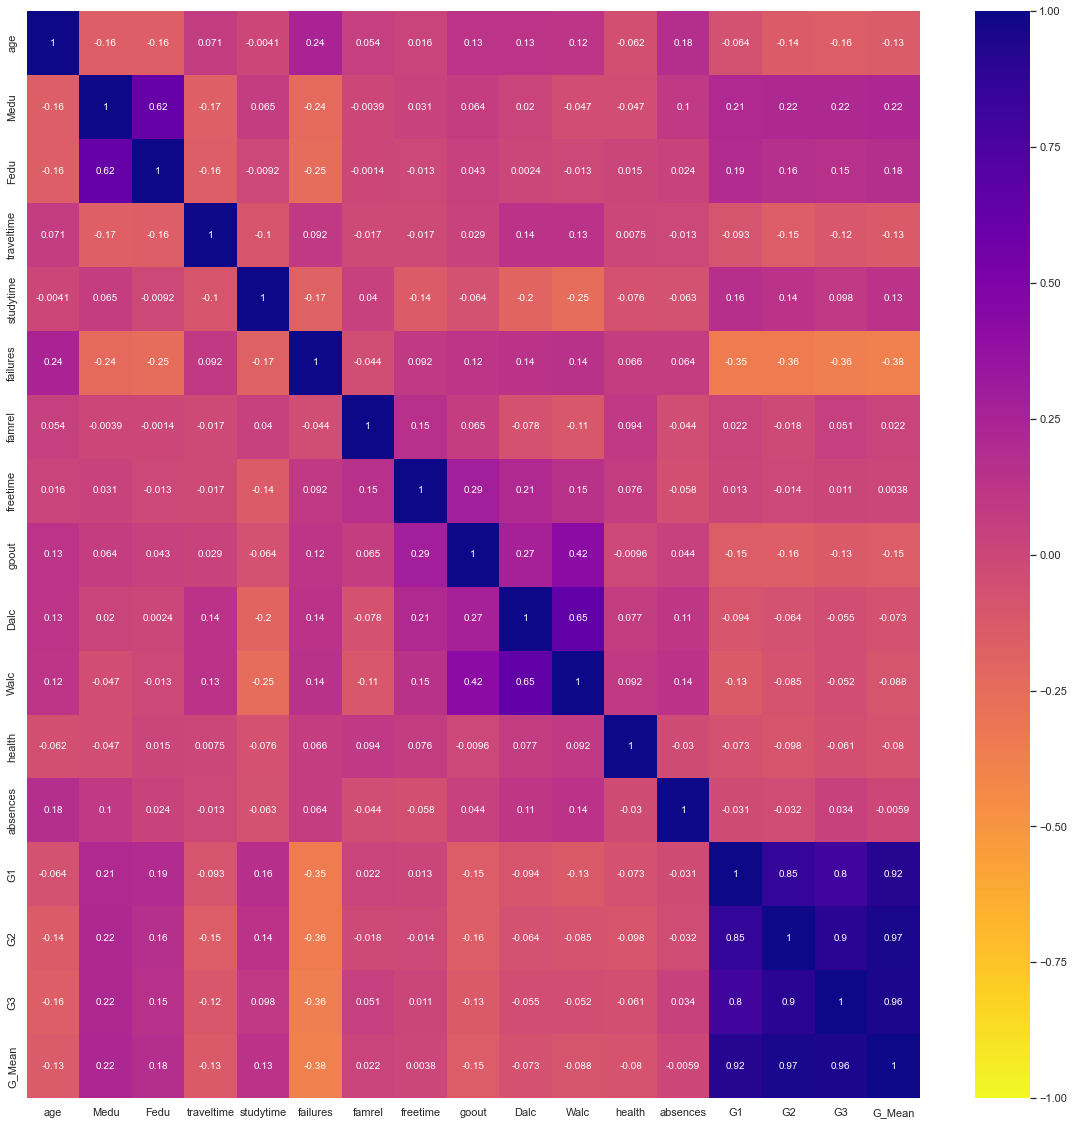

In [197]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, cmap="plasma_r", annot=True)
#same thing can be seen from the correlation as well

C:\Users\DEV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='count'>

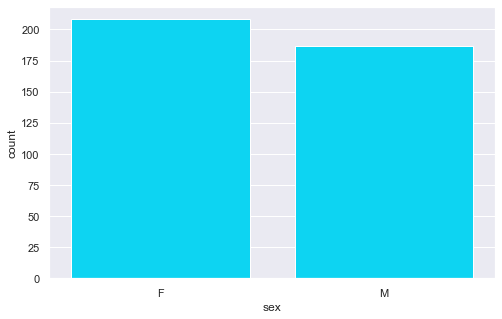

In [198]:
plt.figure(figsize=(8,5))
sns.countplot('sex', data = df, color='#00ddff', saturation=0.9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


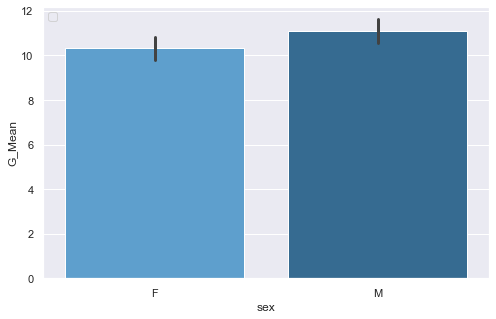

In [199]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'sex', y = 'G_Mean', data = df, errwidth=3,saturation=1, palette='Blues_d') 
plt.legend(loc='upper left')

#### So we can observe there is not much impact of sex on the average grade column. It was also inferred from Predictive Power Score matrix

<AxesSubplot:xlabel='Pstatus', ylabel='count'>

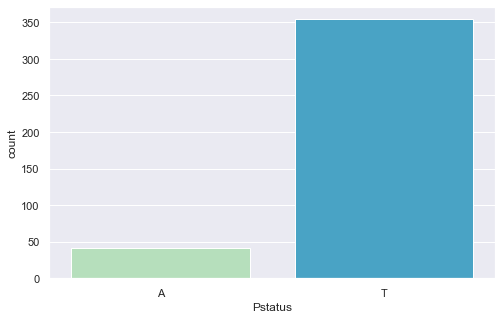

In [200]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pstatus', data = df, palette='GnBu', saturation=0.9)

In [201]:
# plt.figure(figsize=(1,1))
# sns.boxplot(x = 'Pstatus', y = 'G_Mean', hue='sex', data = df, saturation=1)
# plt.legend(loc='upper left')
# plt.ylabel('G Mean')
# plt.xlabel('P Status')
ex.box(x = 'Pstatus', y = 'G_Mean', color='sex', data_frame = df, template='seaborn', 
       notched=True, width=650, height=450)

#### With respect to Pstatus, we can observe that when Pstatus = A, male students are performing better than their female counterpart but when Pstatus = T, there is not much difference between the performance of male and female students.

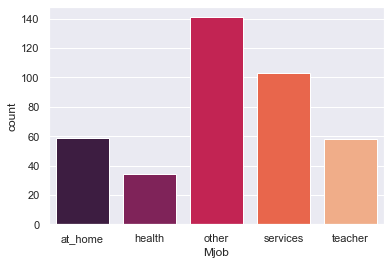

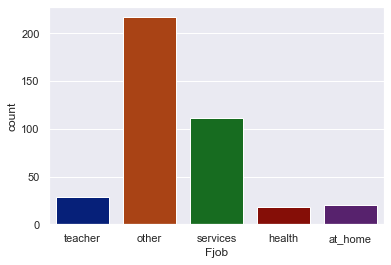

In [13]:
sns.countplot(x='Mjob', data = df, palette='rocket', saturation=0.9)
plt.show()
sns.countplot(x='Fjob', data = df, palette='dark', saturation=0.9)
plt.show()

In [14]:
# plt.subplot(2,1,1)
# sns.boxplot(x=df['Mjob'], y = df['G_Mean'], palette='rocket', saturation=0.9)
ex.box(x=df['Mjob'], y = df['G_Mean'], color=df['Mjob'], height=330, width=800)
# plt.show()
# plt.subplot(2,1,1)
# sns.boxplot(x=df['Fjob'], y = df['G_Mean'], palette='rocket', saturation=0.9)
# plt.show()

In [15]:
ex.box(x=df['Fjob'], y = df['G_Mean'], color=df['Fjob'], height=330, width=800)

#### Based on the Fjob, if Fjob = teacher, the average grade is a bit better. But in case of Mjob, when Mjob = health ie mother's are associated with health related servcies, the average grade is higher. But there also an outlier in case of Mjob = services where the grade goes down much below the average.

#### Otherwise Mjob and Fjob doesn't impact much on the average grade.

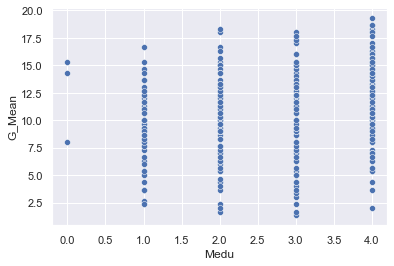

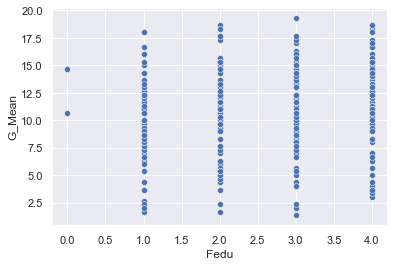

In [16]:
sns.scatterplot(x = 'Medu', y = 'G_Mean', data = df)
plt.show()
sns.scatterplot(x = 'Fedu', y = 'G_Mean', data = df)
plt.show()

#### As the Medu (Mother Education) and Fedu (Father Education) increases, there is an increase in the average grade as well.

## <u> Que- 2:
- If there is a need for encoding some of the features, how would you go about it?
- can we consider combining certain encodings together ?

In [19]:
df.select_dtypes(include='object').head(4)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes


 - There're 17 features having dtypes as object
- we've already seen from predictive pre processor matrix that school, pstatus, higher have more impact on the average grade
- so we can assign some ranking to these columns and the for the other columns, they are nominal data
- for the ordinal columns (in which Ranking is Important) we will go with the Label encoding and for the nominal column we will do One hot encoding

In [26]:
encode_data = df.copy() # keeping a copy and not the same object reference so that we can use new_alcdata later on

In [41]:
# Label Encoding the following columns as the student's average grade is better when these have appropriate value.
lencoder = LabelEncoder() 
encode_data['school'] = lencoder.fit_transform(encode_data['school'])
encode_data['higher'] = lencoder.fit_transform(encode_data['higher'])
encode_data['Pstatus'] = lencoder.fit_transform(encode_data['Pstatus'])

In [54]:
# for the other categorical columns we'll do One hot encoding
for object_feature in encode_data.dtypes[encode_data.dtypes == 'object'].index:
     encode_data[object_feature] = encode_data[object_feature].astype('category')

for object_feature in encode_data.dtypes[encode_data.dtypes == 'category'].index:
        encode_dt = pd.get_dummies(encode_data[object_feature])
        encode_data.append(encode_dt)

In [56]:
encode_alcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    int32   
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    int32   
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

### 3.Figure out how family relation(famrel) and parents cohabitation(Pstatus) affect grades of students.

In [76]:
# sns.boxplot(x = 'Pstatus', y = 'G_Mean', data = df)
ex.box(x = 'Pstatus', y = 'G_Mean', data_frame= df, color='Pstatus',height=350, width=510, title='G Mean Vs Pstatus')

In [73]:
# sns.boxplot(x = 'famrel', y = 'G_Mean', hue='sex', data = df)
ex.box(x = 'famrel', y = 'G_Mean', data_frame= df, color='sex',height=350, width=510, title='G Mean Vs Famrel')

#### The Pstatus feature doesn't impact much on the grades of the student. But for famrel, there is an impact. The male students tends to perform better when the famrel is very low comapred to their female counterpart. When famrel >=3, both the male and female students perform at par with each other.

In [118]:
data = {'Pstatus': encode_data.Pstatus, 'Famrel': encode_data.famrel, 'G_Mean': encode_data.G_Mean}
df_2 = pd.DataFrame(data, columns = ['Pstatus', 'Famrel', 'G_Mean'])
df_2.sample(4)

,Pstatus,Famrel,G_Mean
174,1,4,10.000000
296,1,2,6.333333
79,1,2,5.000000
394,1,3,8.666667


<AxesSubplot:>

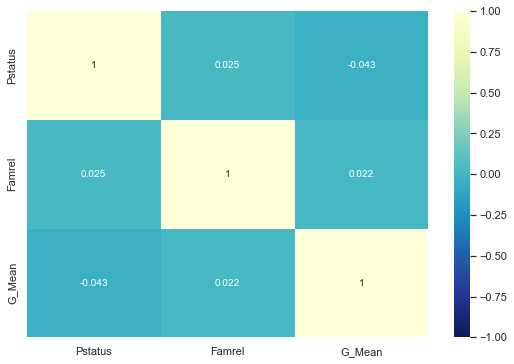

In [119]:
plt.figure(figsize=(9,6))
sns.heatmap(df_2.corr(), vmin=-1, annot=True, cmap='YlGnBu_r')

### 4. Figure out which features in the data are skewed, and propose a way to remove skew from all such columns.
- skewness = 0: normally distributed
- skewness > 0: more weight in the left tail of the distribution(left skewed)
- skewness < 0: more weight in the right tail of the distribution(right skewed).

In [122]:
skew_df = df.skew()
skew_df

C:\Users\DEV\AppData\Local\Temp/ipykernel_2552/4052606346.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



age           0.466270
Medu         -0.318381
Fedu         -0.031672
traveltime    1.607029
studytime     0.632142
failures      2.387026
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
G1            0.240613
G2           -0.431645
G3           -0.732672
dtype: float64

In [124]:
mean_absences = np.average(df.absences)
mean_absences

5.708860759493671

#### We can observe from skew matrix values that the feature 'absences' is left skewed. So we can apply log function on it to make it normally distributed. Before applying log function on it, we need to replace the the 0 values with the mean otherwise log function cannot be applied.

In [130]:
C = df['absences'].replace(0, mean_absences)

C:\Users\DEV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



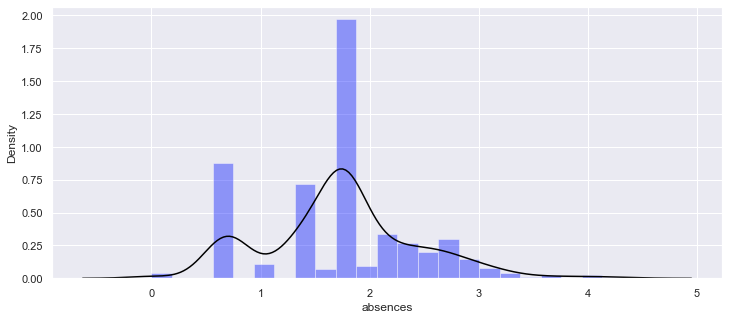

In [154]:
plt.figure(figsize=(12,5))
sns.distplot(np.log(check), kde = True, color='#0011ff', kde_kws={'color':'black'})
plt.show()

In [168]:
ex.box(x= np.log10( np.log10(df.age) ), height=280, width=600)
# sns.boxplot(np.log10(np.log10(new_alcdata.age)))

In [170]:
np.log(df['Dalc'])

0      0.000000
1      0.000000
2      0.693147
3      0.000000
4      0.000000
         ...   
390    1.386294
391    1.098612
392    1.098612
393    1.098612
394    1.098612
Name: Dalc, Length: 395, dtype: float64

#### In the Workday Alcohol Consumption(Dalc) feature also, it's left skewed and hence we apply log on it. But before apply for the second time, we replace the 0's generated by the previous log function with the mean of the log values generated earlier.

C:\Users\DEV\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

invalid value encountered in log

C:\Users\DEV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Dalc', ylabel='Density'>

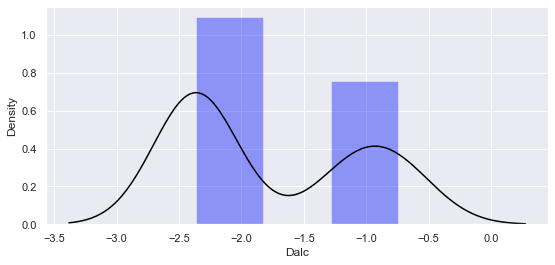

In [179]:
plt.figure(figsize=(9,4))
sns.distplot(np.log(np.log(np.log(df['Dalc']).replace(0, np.mean(np.log(df['Dalc']))))), kde=True,
             color='#0011ff', kde_kws={'color':'black'})

#### From the skew matrix, it can be seen that that the 'famrel' feature is having negative skew that is it's right skewed. To remove the skewness from the data we apply the power function it.

C:\Users\DEV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='famrel', ylabel='Density'>

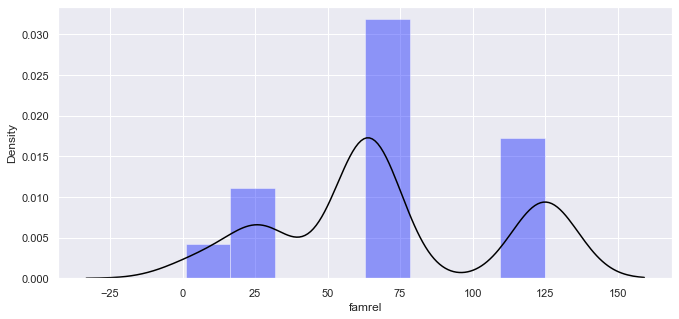

In [185]:
plt.figure(figsize=(11,5))
sns.distplot( np.power(df['famrel'],3), kde=True,
             color='#0011ff', kde_kws={'color':'black'} )

### I Hope You Liked the Notebook and Learned something new from the Notebook